
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [137]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


In [138]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,),kernel_initializer='uniform')) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500, kernel_initializer='uniform')) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500, kernel_initializer='uniform')) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500, kernel_initializer='uniform')) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10, kernel_initializer='uniform')) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [139]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [140]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_21 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_22 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_23 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)               250500    
__________

In [141]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''
opt = keras.optimizers.SGD(lr=0.1, momentum=0.9, decay=0.95, nesterov=True)
'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
opt = keras.optimizers.RMSprop(lr=0.001)

In [142]:
# 第三步：編譯, 
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [143]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = (X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])).astype('float32') / 255.
X_test = (X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])).astype('float32') / 255.
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [144]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
'''
batch_size = 256
epochs = 20


In [145]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.999)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size=batch_size, epochs=epochs,
                    shuffle=True,verbose=2,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 2s - loss: 0.0823 - acc: 0.9707 - val_loss: 0.0296 - val_acc: 0.9901
Epoch 2/20
 - 2s - loss: 0.0260 - acc: 0.9915 - val_loss: 0.0363 - val_acc: 0.9888
Epoch 3/20
 - 2s - loss: 0.0164 - acc: 0.9948 - val_loss: 0.0203 - val_acc: 0.9940
Epoch 4/20
 - 2s - loss: 0.0120 - acc: 0.9963 - val_loss: 0.0194 - val_acc: 0.9944
Epoch 5/20
 - 2s - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0197 - val_acc: 0.9949
Epoch 6/20
 - 2s - loss: 0.0075 - acc: 0.9977 - val_loss: 0.0210 - val_acc: 0.9947
Epoch 7/20
 - 2s - loss: 0.0066 - acc: 0.9980 - val_loss: 0.0200 - val_acc: 0.9948
Epoch 8/20
 - 2s - loss: 0.0053 - acc: 0.9984 - val_loss: 0.0259 - val_acc: 0.9945
Epoch 9/20
 - 2s - loss: 0.0044 - acc: 0.9987 - val_loss: 0.0568 - val_acc: 0.9911
Epoch 10/20
 - 2s - loss: 0.0041 - acc: 0.9988 - val_loss: 0.0266 - val_acc: 0.9954
Epoch 11/20
 - 2s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0271 - val_acc: 0.9951
Epoch 12/20
 - 2s - loss: 0.0035 - 

In [146]:
#    第六步：輸出
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.02919830844754415, 0.9956800174713135]

 The accuracy of the model is 0.978000 


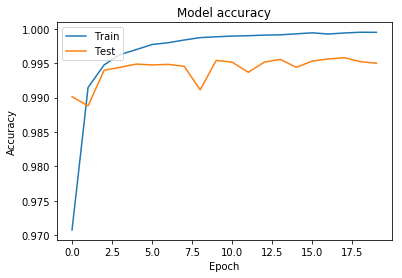

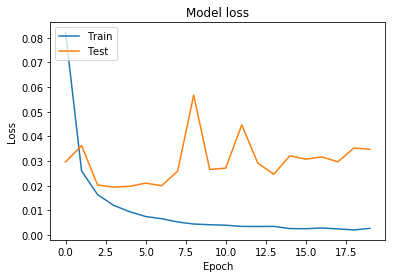

In [147]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()